In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [122]:
df = pd.read_csv('./dataframe.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df.language != 'Dutch']
df = df[df.error_type != 'S']
df = df[df.error_type != 'SA']
df = df[df.error_type != 'SX']

In [123]:
def concat_dummies(df, dummies):
    for dummy in list(dummies):
        df[dummy] = dummies[dummy]
    return list(dummies)

In [124]:
def create_dummies(df, column, prefix):
    dummies = pd.get_dummies(df[column], prefix=prefix)
    return concat_dummies(df, dummies)

In [125]:
w_first_pos = create_dummies(df, 'error_pos', 'w_first_pos')
w_second_pos = create_dummies(df, 'error_pos_2', 'w_second_pos')
w_third_pos = create_dummies(df, 'error_pos_3', 'w_third_pos')
c_first_pos = create_dummies(df, 'correct_pos', 'c_first_pos')
c_second_pos = create_dummies(df, 'correct_pos_2', 'c_second_pos')
c_third_pos = create_dummies(df, 'correct_pos_3', 'c_third_pos')

In [126]:
w_first_dep = create_dummies(df, 'e_dep', 'w_first_dep')
w_second_dep = create_dummies(df, 'e_dep_2', 'w_second_dep')
w_third_dep = create_dummies(df, 'e_dep_3', 'w_third_dep')
c_first_dep = create_dummies(df, 'c_dep', 'c_first_dep')
c_second_dep = create_dummies(df, 'c_dep_2', 'c_second_dep')
c_third_dep = create_dummies(df, 'c_dep_3', 'c_third_dep')

In [127]:
languages = {'language': {'French': 1, 'Spanish': 2, 'Catalan': 3, 'Portuguese': 4, 'Italian': 5, 'Polish': 6, 'Russian': 7,
'Greek': 8,'German': 9, 'Swedish': 10, 'Japanese': 11, 'Korean': 12, 'Turkish': 13, 'Chinese': 14, 'Thai':15}}
df.replace(languages, inplace=True)

In [142]:
y = df['error_type']

In [143]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
fit_data = x_train[list(w_first_pos) + list(w_second_pos)
        + list(w_third_pos) + list(c_first_pos) + list(c_second_pos) 
        + list(c_third_pos) + list(w_first_dep) + list(w_second_dep) 
        + list(w_third_dep) + list(c_first_dep) + list(c_second_dep) 
        + list(c_third_dep) + ['language', 'error_length',
         'first_first_pos', 'first_second_pos', 'first_third_pos',
         'second_first_pos', 'second_second_pos', 'second_third_pos',
         'third_first_pos', 'third_second_pos', 'third_third_pos',
         'first_first_dep', 'first_second_dep', 'first_third_dep',
         'second_first_dep', 'second_second_dep', 'second_third_dep',
         'third_first_dep', 'third_second_dep', 'third_third_dep']]
test_data = x_test[list(w_first_pos) + list(w_second_pos)
        + list(w_third_pos) + list(c_first_pos) + list(c_second_pos)
        + list(c_third_pos) + list(w_first_dep) + list(w_second_dep) 
        + list(w_third_dep) + list(c_first_dep) + list(c_second_dep) 
        + list(c_third_dep) + ['language', 'error_length',
         'first_first_pos', 'first_second_pos', 'first_third_pos',
         'second_first_pos', 'second_second_pos', 'second_third_pos',
         'third_first_pos', 'third_second_pos', 'third_third_pos',
         'first_first_dep', 'first_second_dep', 'first_third_dep',
         'second_first_dep', 'second_second_dep', 'second_third_dep',
         'third_first_dep', 'third_second_dep', 'third_third_dep']]

In [144]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=0)
clf.fit(fit_data, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [145]:
clf.score(test_data, y_test)

0.7382938872807764

In [135]:
predictions = clf.predict(test_data)
values = list(y_test)
count = 0
dict_errors = {}
for i in range(len(predictions)):
    if predictions[i] != values[i]:
        tuple_err = predictions[i] + ' ' + values[i]
        if tuple_err in dict_errors:
            dict_errors[tuple_err] += 1
        else:
            dict_errors[tuple_err] = 1

for t in dict_errors.keys():
    if dict_errors[t] > 1:
        print(t, dict_errors[t])

FN CN 11
AGN FN 55
RV TV 39
UT W 4
R UV 2
RN DN 44
R RT 18
FN AGN 56
RD CD 2
TV UV 10
UD UC 2
TV RV 71
ID R 5
DN R 4
TV RA 4
UD UQ 8
UT UY 4
FV RN 4
R RJ 3
RA X 2
W ID 7
W FJ 2
RN W 4
DY RY 15
RJ FJ 3
RA R 9
AGN CN 6
UT UA 2
FN RN 14
R RD 10
U R 6
TV DJ 4
TV FV 11
RD R 17
AGD RD 7
TV W 2
UT RT 3
R U 16
TV IV 8
FV TV 13
R RA 10
R RN 6
TV X 5
RD RQ 5
R W 18
TV U 4
RY DY 26
R RY 10
RJ R 3
RA UV 2
U W 3
RY FY 6
AGA RA 5
TV R 8
RV UV 14
TV AGV 11
CN FN 15
DJ R 4
FV IV 2
W U 9
R AGV 2
RV IV 54
W AS 11
FV RV 8
RT R 19
UT R 23
TV RJ 2
FV UC 3
CN AGN 7
UD U 2
RV AS 6
RY ID 2
DJ RJ 9
W RN 4
RV DV 15
UD RA 5
TV AS 3
R UT 11
IQ R 2
RV FV 9
DY RC 3
AGD RQ 2
W R 16
RJ DJ 25
RN CN 2
UV W 2
FY RY 2
FN DN 4
RY UY 3
RJ CQ 8
ID RT 2
FN DJ 3
RN R 11
RD FD 14
RD CQ 2
RN L 8
RJ ID 2
AGN IN 3
UD R 7
RJ RN 2
U UV 3
R AGN 2
UD DA 3
RN IN 17
UV RA 2
RA AGA 17
RY W 2
AGV TV 2
RV AGV 13
UC UY 2
FV R 6
RQ R 2
DN RN 10
RV U 2
RA UD 2
RA TV 3
RT ID 4
R RC 10
RN RA 12
TV DV 2
RY RC 3
RV R 15
AGN DN 3
R UY 7
RA DA 3
R

In [136]:
importances = pd.DataFrame({'feature': list(fit_data), 'feature_importance': clf.feature_importances_})
importances = importances.set_index('feature')

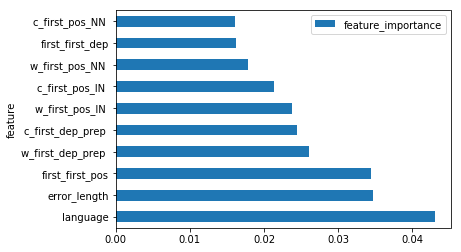

In [137]:
importances = importances.sort_values(by=['feature_importance'], ascending=False)
top_10 = importances[:10]
top_10.plot(kind='barh')